In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [8]:
df = pd.read_csv("weatherAUS.csv") 

In [9]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [10]:
df = df.dropna()

In [11]:
X = df.drop(['RainTomorrow'], axis=1) 
y = df['RainTomorrow']

In [12]:
X = pd.get_dummies(X)  


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
scaler = StandardScaler()   
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [17]:
y_train = (y_train == 'Yes').astype(int)  
y_test = (y_test == 'Yes').astype(int) 

In [18]:
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/10
1411/1411 [==============================] - 60s 9ms/step - loss: 0.3954 - accuracy: 0.8239 - val_loss: 0.3637 - val_accuracy: 0.8405
Epoch 2/10
1411/1411 [==============================] - 7s 5ms/step - loss: 0.3131 - accuracy: 0.8588 - val_loss: 0.3671 - val_accuracy: 0.8437
Epoch 3/10
1411/1411 [==============================] - 8s 6ms/step - loss: 0.2787 - accuracy: 0.8736 - val_loss: 0.3690 - val_accuracy: 0.8479
Epoch 4/10
1411/1411 [==============================] - 8s 6ms/step - loss: 0.2466 - accuracy: 0.8888 - val_loss: 0.3858 - val_accuracy: 0.8491
Epoch 5/10
1411/1411 [==============================] - 8s 6ms/step - loss: 0.2066 - accuracy: 0.9081 - val_loss: 0.4144 - val_accuracy: 0.8462
Epoch 6/10
1411/1411 [==============================] - 8s 6ms/step - loss: 0.1613 - accuracy: 0.9295 - val_loss: 0.5019 - val_accuracy: 0.8489
Epoch 7/10
1411/1411 [==============================] - 8s 6ms/step - loss: 0.1136 - accuracy: 0.9531 - val_loss: 0.6553 - val_accuracy

In [19]:
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int)

353/353 [==============================] - 1s 2ms/step


In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")

Accuracy on the test set: 0.8436724565756824


In [21]:
from sklearn.metrics import confusion_matrix


In [22]:
cm = confusion_matrix(y_test, y_pred)

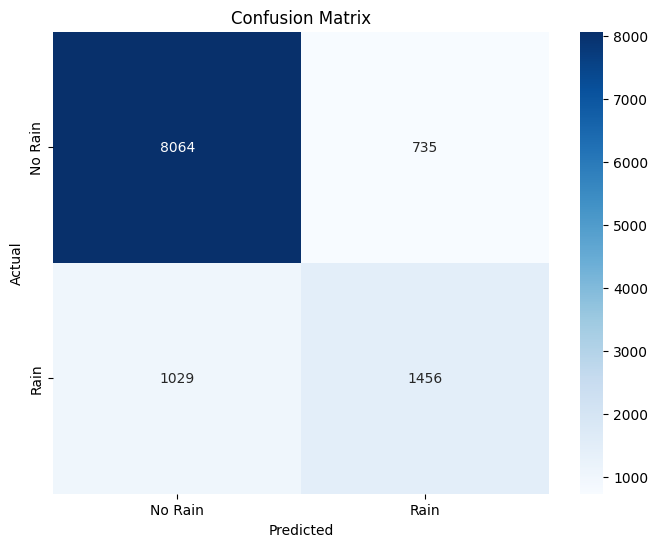

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [24]:
from sklearn.metrics import precision_score, matthews_corrcoef


In [25]:
# Calculate precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

Precision: 0.6645


In [26]:
# Calculate MCC
mcc = matthews_corrcoef(y_test, y_pred)
print(f'MCC: {mcc:.4f}')

MCC: 0.5263
